In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate small synthetic dataset
np.random.seed(42)
n = 200

df = pd.DataFrame({
    "customer_id": range(1, n+1),
    "credit_score": np.random.normal(700, 50, n).astype(int),
    "utilization_rate": np.random.uniform(0.1, 0.95, n),
    "on_time_payments": np.random.uniform(0.75, 1.00, n),
    "monthly_spend": np.random.normal(1200, 400, n),
    "tenure_months": np.random.randint(3, 60, n),
})

# define simple CLI eligibility
df["eligible_for_cli"] = (
    (df["credit_score"] > 680) &
    (df["utilization_rate"] < 0.60) &
    (df["on_time_payments"] > 0.90) &
    (df["tenure_months"] > 12)
)


In [3]:
# summary stats
eligibility_rate = df["eligible_for_cli"].mean()


In [4]:
# segmentation
segment_summary = df.groupby("eligible_for_cli")[["credit_score", "utilization_rate", "on_time_payments"]].mean()



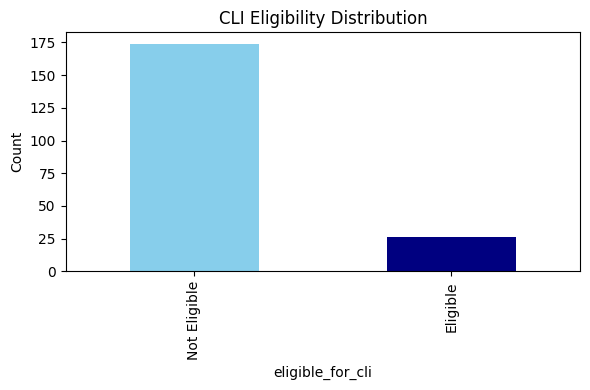

(0.13,
                   credit_score  utilization_rate  on_time_payments
 eligible_for_cli                                                  
 False               694.086207          0.557776          0.863447
 True                719.961538          0.281620          0.956932)

In [5]:
# visualization
plt.figure(figsize=(6,4))
df["eligible_for_cli"].value_counts().plot(kind="bar", color=["skyblue", "navy"])
plt.title("CLI Eligibility Distribution")
plt.xticks([0,1], ["Not Eligible", "Eligible"])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

df.head()
eligibility_rate, segment_summary


# Distribution of Credit Score

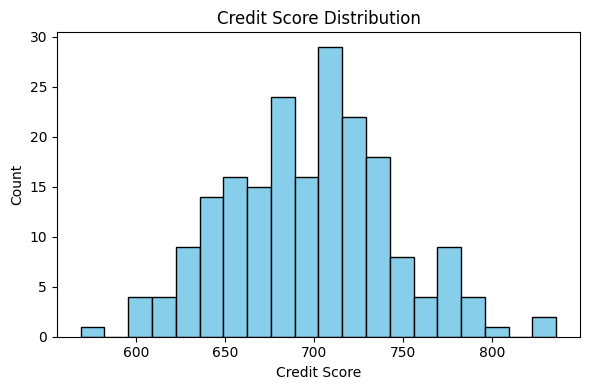

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df["credit_score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Utilization Score vs Credit Score

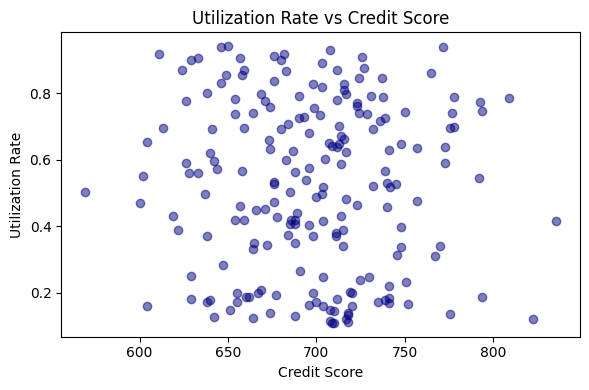

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df["credit_score"], df["utilization_rate"], alpha=0.5, color="navy")
plt.title("Utilization Rate vs Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Utilization Rate")
plt.tight_layout()
plt.show()


# Payment Behavior Distribution

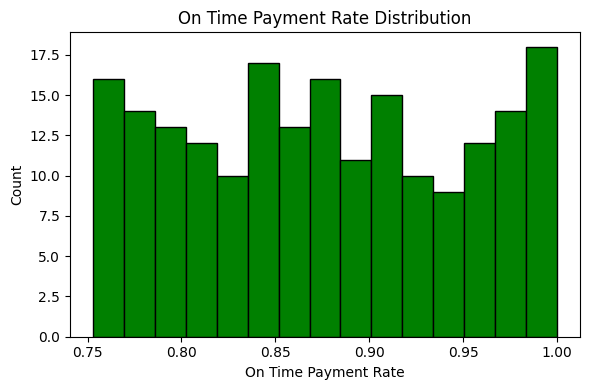

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df["on_time_payments"], bins=15, color="green", edgecolor="black")
plt.title("On Time Payment Rate Distribution")
plt.xlabel("On Time Payment Rate")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Tenure Histogram

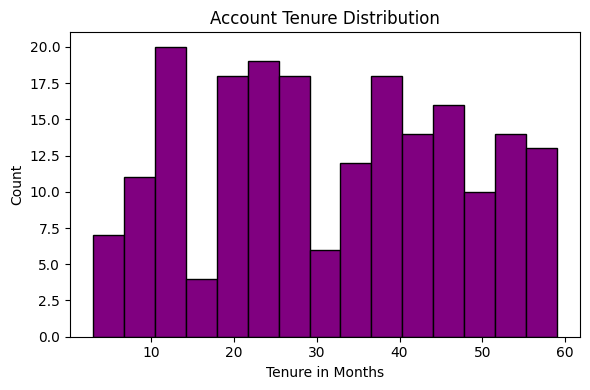

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df["tenure_months"], bins=15, color="purple", edgecolor="black")
plt.title("Account Tenure Distribution")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Average Metrics for Eligible vs Not Eligible


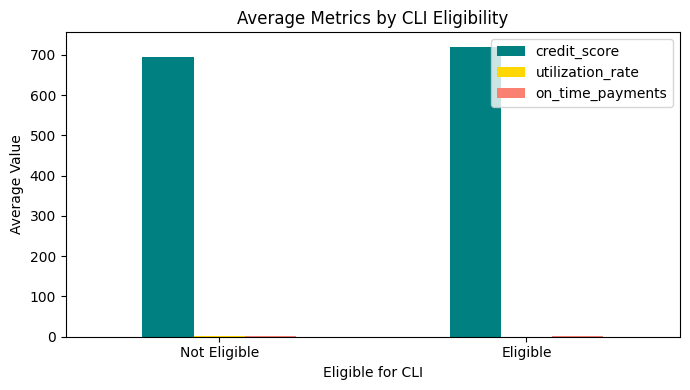

In [10]:
eligible_group = df.groupby("eligible_for_cli")[["credit_score","utilization_rate","on_time_payments"]].mean()

eligible_group.plot(kind="bar", figsize=(7,4), color=["teal", "gold", "salmon"])
plt.title("Average Metrics by CLI Eligibility")
plt.xlabel("Eligible for CLI")
plt.ylabel("Average Value")
plt.xticks([0,1], ["Not Eligible", "Eligible"], rotation=0)
plt.tight_layout()
plt.show()


# CLI Eligibility by Tenure Bucket

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_60194/4127928251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_cli = df.groupby("tenure_bucket")["eligible_for_cli"].mean()


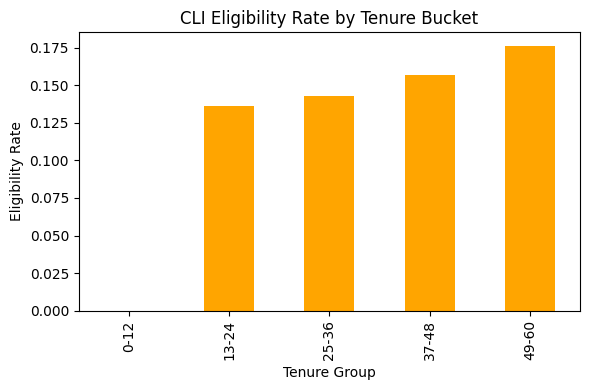

In [11]:
df["tenure_bucket"] = pd.cut(df["tenure_months"], bins=[0,12,24,36,48,60], 
                             labels=["0-12","13-24","25-36","37-48","49-60"])

tenure_cli = df.groupby("tenure_bucket")["eligible_for_cli"].mean()

tenure_cli.plot(kind="bar", figsize=(6,4), color="orange")
plt.title("CLI Eligibility Rate by Tenure Bucket")
plt.xlabel("Tenure Group")
plt.ylabel("Eligibility Rate")
plt.tight_layout()
plt.show()


# Monthly Spend Distribution Chart

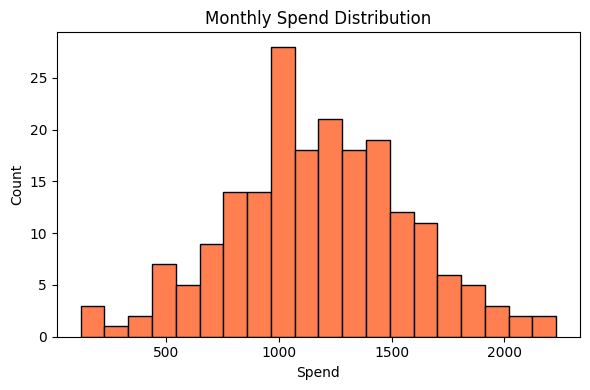

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df["monthly_spend"], bins=20, color="coral", edgecolor="black")
plt.title("Monthly Spend Distribution")
plt.xlabel("Spend")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Pairwise Relationship Plot

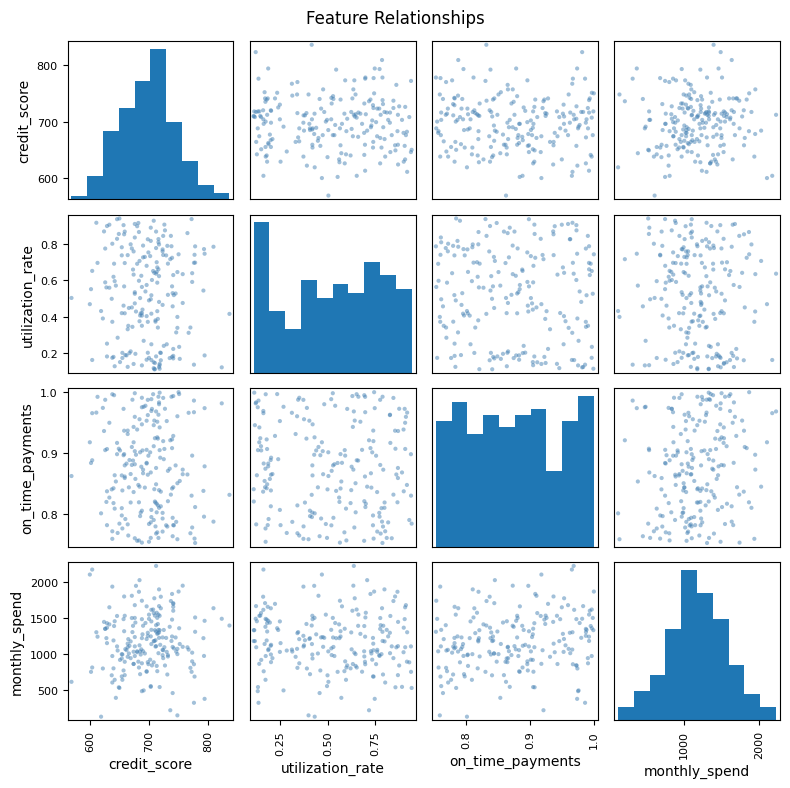

In [13]:
pd.plotting.scatter_matrix(df[["credit_score","utilization_rate","on_time_payments","monthly_spend"]], 
                           figsize=(8,8), diagonal="hist", color="steelblue")
plt.suptitle("Feature Relationships")
plt.tight_layout()
plt.show()
